## **Normal Task: Climate data Analysis**

**Data Analysis(Climate conditions) of NewYork state**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
daily_data = pd.read_csv('/content/daily_data.csv', parse_dates=['DATE'], na_values=['SOD', 'PRECIP', 'other_non_numeric_values'])

# Display the first few rows
print("Daily Data:")
print(daily_data.head())

Daily Data:
       STATION                DATE REPORT_TYPE  SOURCE  BackupElements  \
0  72518014735 2015-01-01 23:59:00       SOD         6             NaN   
1  72518014735 2015-01-02 23:59:00       SOD         6             NaN   
2  72518014735 2015-01-03 23:59:00       SOD         6             NaN   
3  72518014735 2015-01-04 23:59:00       SOD         6             NaN   
4  72518014735 2015-01-05 23:59:00       SOD         6             NaN   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ...  DailyPeakWindDirection  DailyPeakWindSpeed  \
0  NWS ALBANY, NY  ...                   190.0

# Basic statistics

In [ ]:
print("\nBasic Statistics:")
print(daily_data.describe())


Basic Statistics:
            STATION  SOURCE  BackupElements  BackupElevation  BackupLatitude  \
count  2.668000e+03  2668.0             0.0           2668.0     2668.000000   
mean   7.251801e+10     6.0             NaN            260.0       42.689750   
std    0.000000e+00     0.0             NaN              0.0        0.004187   
min    7.251801e+10     6.0             NaN            260.0       42.681200   
25%    7.251801e+10     6.0             NaN            260.0       42.691800   
50%    7.251801e+10     6.0             NaN            260.0       42.691800   
75%    7.251801e+10     6.0             NaN            260.0       42.691800   
max    7.251801e+10     6.0             NaN            260.0       42.691800   

       BackupLongitude  DailyAverageDewPointTemperature  \
count      2668.000000                      2668.000000   
mean        -73.828268                        38.217766   
std           0.005764                        19.116250   
min         -73.831090  

Monthly Aggregations

In [ ]:
daily_data = pd.read_csv('/content/daily_data.csv', parse_dates=['DATE'], na_values=['s', 'T', 'M'])
daily_data['Month'] = daily_data['DATE'].dt.month
monthly_aggregations = daily_data.groupby('Month').agg({'DailyAverageDryBulbTemperature': 'mean', 'DailyPrecipitation': 'sum'})
# Display monthly aggregations
print("Monthly Aggregations:")
print(monthly_aggregations)

Monthly Aggregations:
       DailyAverageDryBulbTemperature  DailyPrecipitation
Month                                                    
1                           25.202429               18.36
2                           29.705584               19.94
3                           36.434959               18.76
4                           47.587500               27.35
5                           60.750000               20.62
6                           68.545455               26.96
7                           73.830986               35.11
8                           72.060185               29.82
9                           64.980952               28.02
10                          53.101852               30.46
11                          40.162679               19.91
12                          32.410138               21.28


# **Data Visualization Before Merging all datasets**

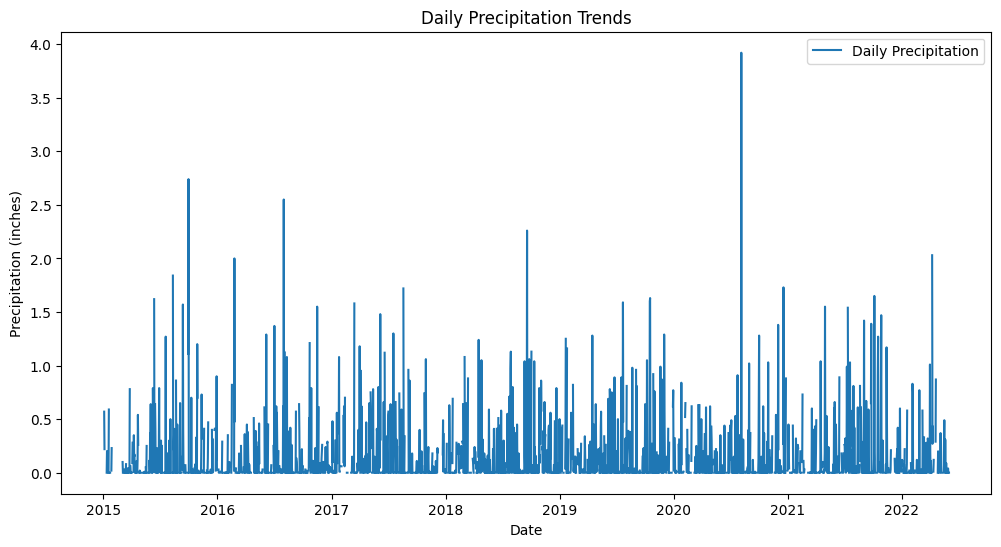

In [ ]:
# Visualize precipitation over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyPrecipitation'], label='Daily Precipitation')
plt.title('Daily Precipitation Trends')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.show()

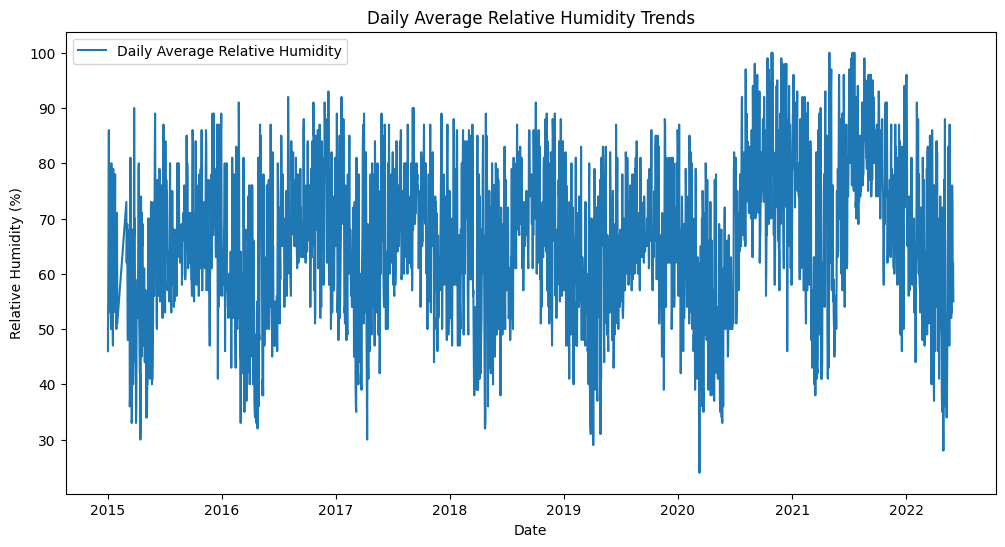

In [ ]:
# Visualize humidity over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageRelativeHumidity'], label='Daily Average Relative Humidity')
plt.title('Daily Average Relative Humidity Trends')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()

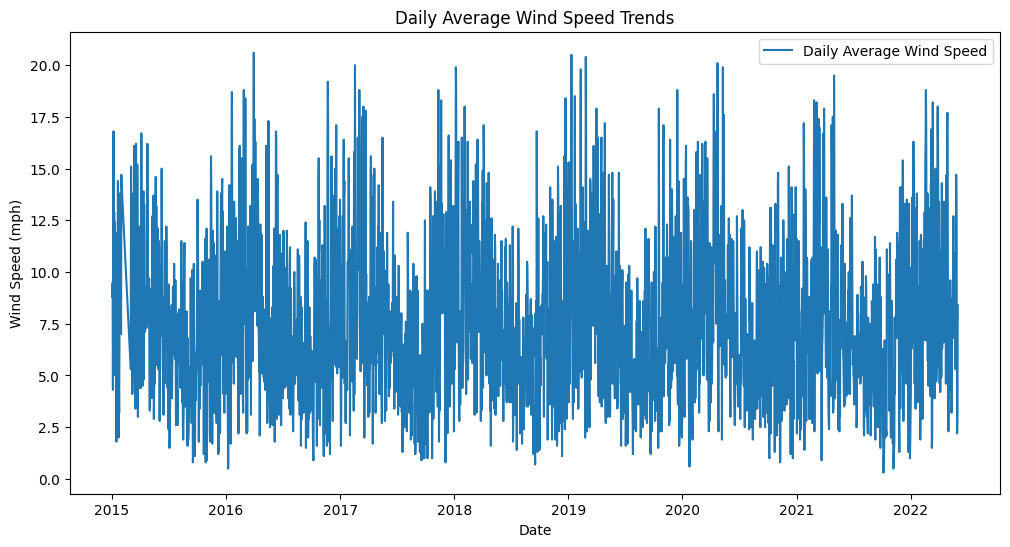

In [ ]:
# Visualize wind speed over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageWindSpeed'], label='Daily Average Wind Speed')
plt.title('Daily Average Wind Speed Trends')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.show()

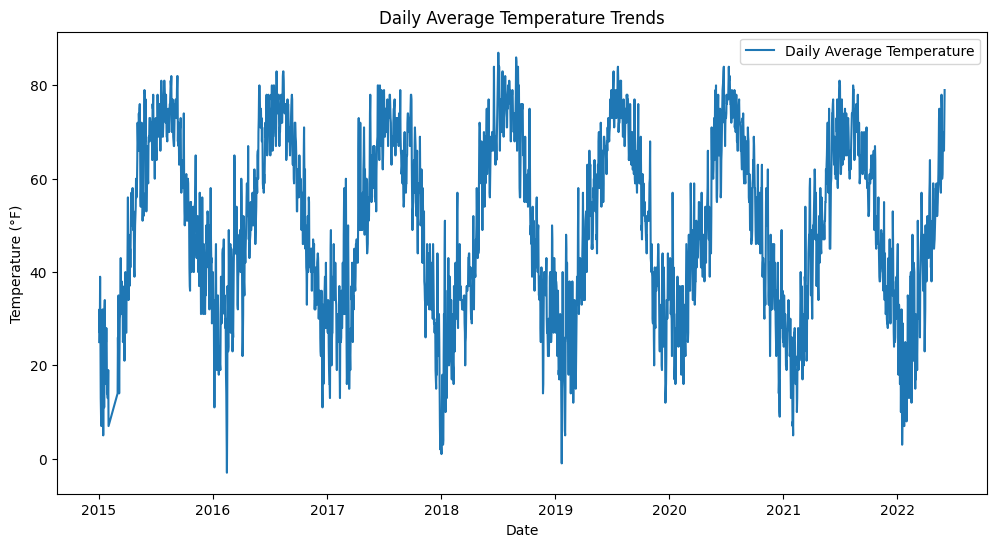

In [ ]:
# Visualize trends over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageDryBulbTemperature'], label='Daily Average Temperature')
plt.title('Daily Average Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

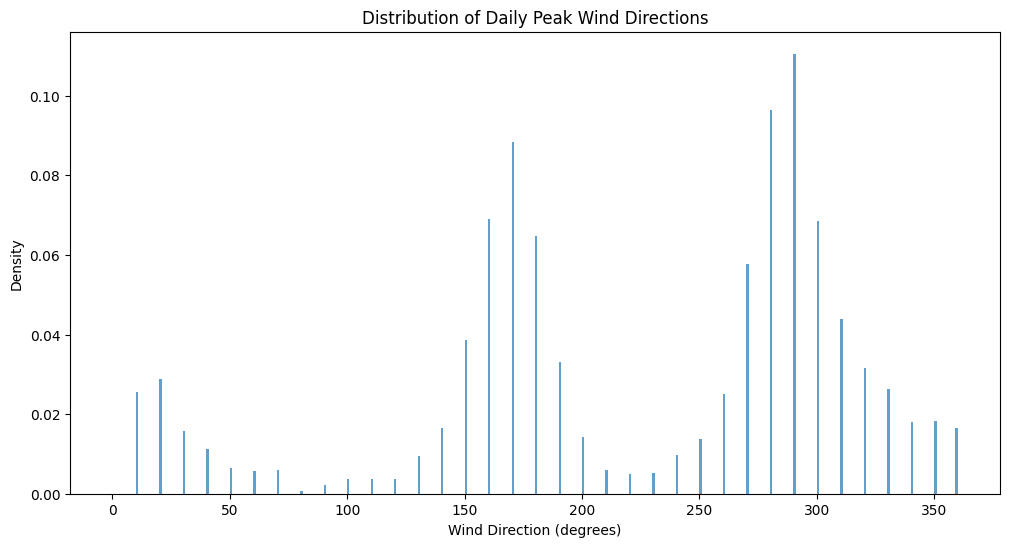

In [ ]:
# Visualize distribution of wind directions
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyPeakWindDirection'].dropna(), bins=360, range=(0, 360), density=True, alpha=0.7)
plt.title('Distribution of Daily Peak Wind Directions')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Density')
plt.show()

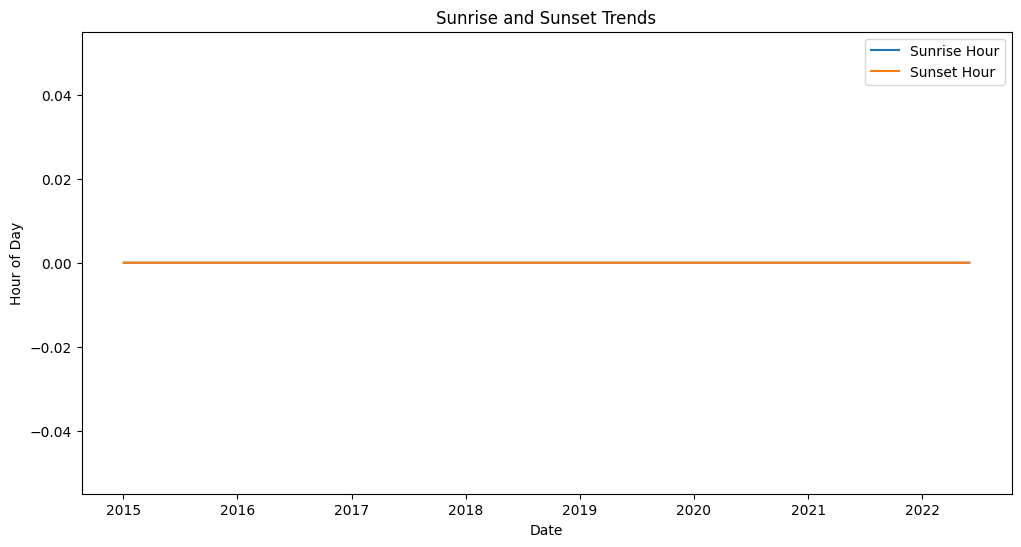

In [ ]:
daily_data = pd.read_csv('/content/daily_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])

# Convert 'Sunrise' and 'Sunset' columns to datetime format
daily_data['Sunrise'] = pd.to_datetime(daily_data['Sunrise'], errors='coerce')
daily_data['Sunset'] = pd.to_datetime(daily_data['Sunset'], errors='coerce')

# Extract hour from sunrise and sunset times
daily_data['Sunrise_Hour'] = daily_data['Sunrise'].dt.hour
daily_data['Sunset_Hour'] = daily_data['Sunset'].dt.hour

# Visualize trends in sunrise and sunset times
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['Sunrise_Hour'], label='Sunrise Hour')
plt.plot(daily_data['DATE'], daily_data['Sunset_Hour'], label='Sunset Hour')
plt.title('Sunrise and Sunset Trends')
plt.xlabel('Date')
plt.ylabel('Hour of Day')
plt.legend()
plt.show()

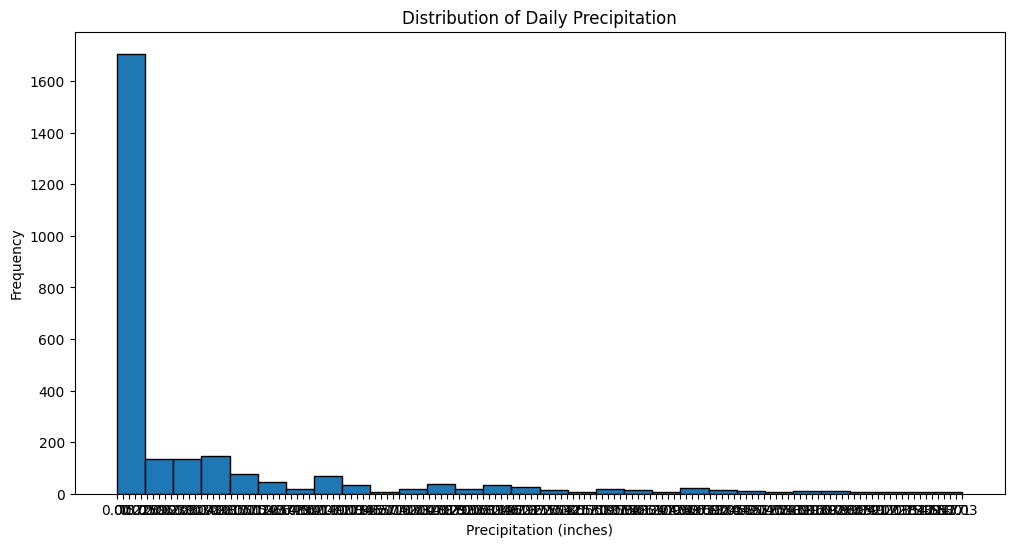

In [ ]:
# Visualize the distribution of daily precipitation
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyPrecipitation'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Daily Precipitation')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.show()

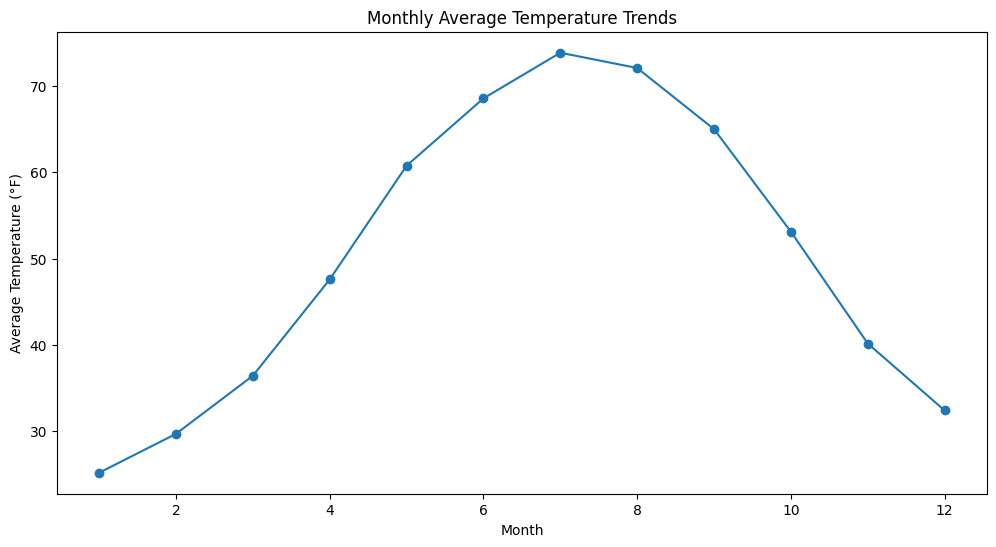

In [ ]:
# Create a new column for the month
daily_data['Month'] = daily_data['DATE'].dt.month

# Calculate average temperature per month
monthly_temperature = daily_data.groupby('Month')['DailyAverageDryBulbTemperature'].mean()

# Visualize trends in monthly average temperature
plt.figure(figsize=(12, 6))
plt.plot(monthly_temperature.index, monthly_temperature.values, marker='o')
plt.title('Monthly Average Temperature Trends')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.show()

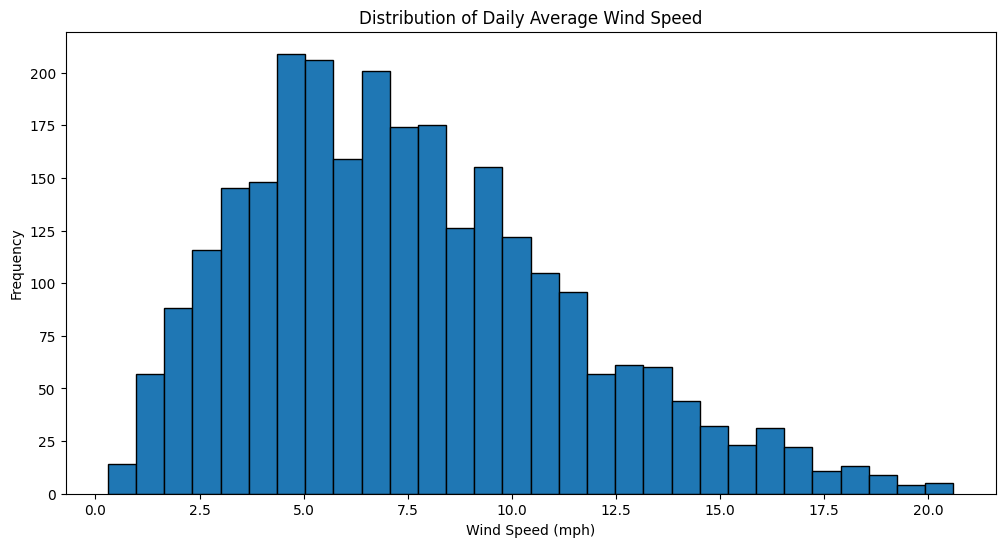

In [ ]:
# Visualize the distribution of daily average wind speed
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyAverageWindSpeed'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Daily Average Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.show()

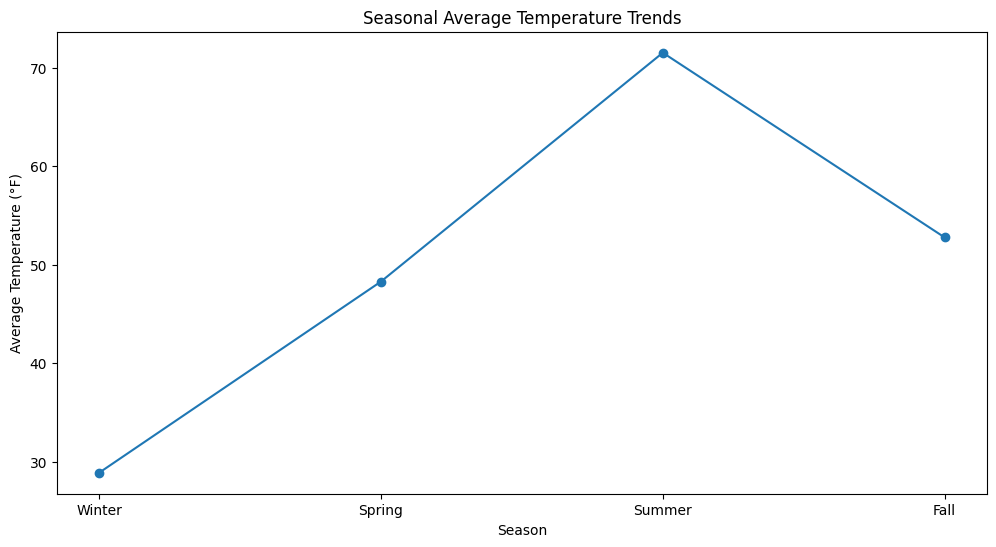

In [ ]:
# Extract the season from the date (e.g., Winter, Spring, Summer, Fall)
daily_data['Season'] = (daily_data['DATE'].dt.month % 12 + 3) // 3

# Calculate average temperature per season
seasonal_temperature = daily_data.groupby('Season')['DailyAverageDryBulbTemperature'].mean()

# Visualize trends in seasonal average temperature
plt.figure(figsize=(12, 6))
plt.plot(seasonal_temperature.index, seasonal_temperature.values, marker='o')
plt.title('Seasonal Average Temperature Trends')
plt.xlabel('Season')
plt.ylabel('Average Temperature (°F)')
plt.xticks([1, 2, 3, 4], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

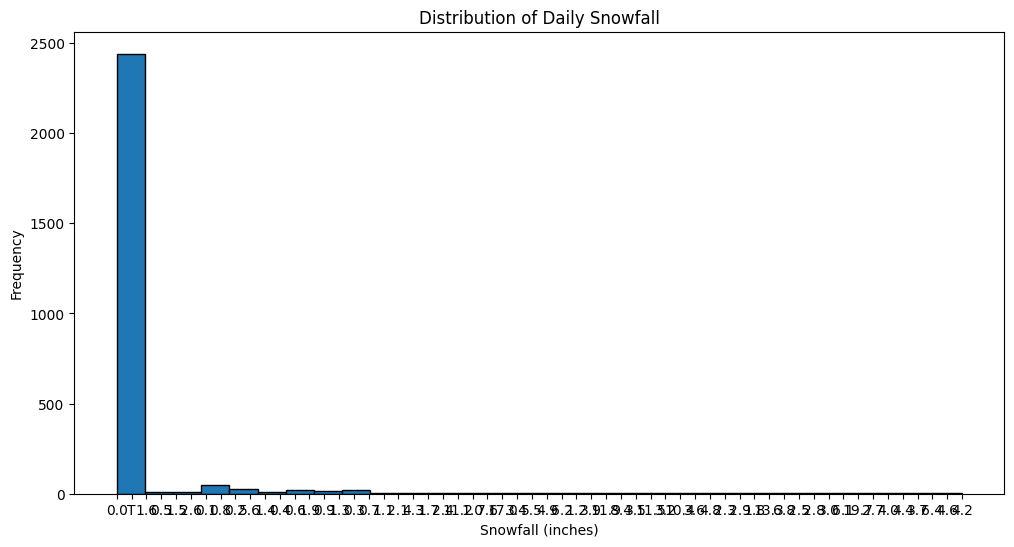

In [ ]:
# Visualize the distribution of daily snowfall
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailySnowfall'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Daily Snowfall')
plt.xlabel('Snowfall (inches)')
plt.ylabel('Frequency')
plt.show()

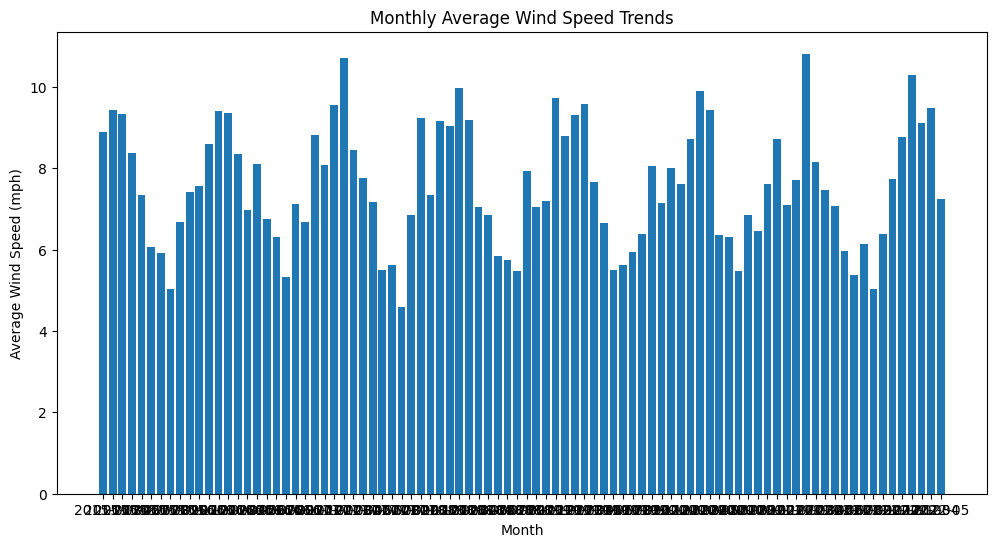

In [ ]:
# Calculate average monthly wind speed
monthly_wind_speed = daily_data.groupby(daily_data['DATE'].dt.to_period("M"))['DailyAverageWindSpeed'].mean()

# Visualize trends in monthly average wind speed
plt.figure(figsize=(12, 6))
plt.bar(monthly_wind_speed.index.astype(str), monthly_wind_speed.values)
plt.title('Monthly Average Wind Speed Trends')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (mph)')
plt.show()

# **Merging**

In [ ]:
daily_data = pd.read_csv('/content/daily_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
hourly_data = pd.read_csv('/content/hourly_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
monthly_data = pd.read_csv('/content/monthly_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
three_hour_data = pd.read_csv('/content/three_hour_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])

# Identify common columns among datasets
common_columns = set(daily_data.columns) & set(hourly_data.columns) & set(monthly_data.columns) & set(three_hour_data.columns)

# Print common columns
print("Common columns:", common_columns)

Common columns: {'BackupEquipment', 'SOURCE', 'DATE', 'BackupElements', 'BackupElevation', 'BackupLatitude', 'WindEquipmentChangeDate', 'BackupName', 'REPORT_TYPE', 'STATION', 'BackupLongitude'}


<ipython-input-19-2e560d4c0f6e>:2: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_data = pd.read_csv('/content/hourly_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])


In [ ]:
daily_data = pd.read_csv('/content/daily_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
hourly_data = pd.read_csv('/content/hourly_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
monthly_data = pd.read_csv('//content/monthly_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
three_hour_data = pd.read_csv('/content/three_hour_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
# Merge the datasets based on 'DATE' with different suffixes
merged_data = pd.merge(daily_data, hourly_data, on='DATE', how='outer', suffixes=('_daily', '_hourly'))
merged_data = pd.merge(merged_data, monthly_data, on='DATE', how='outer', suffixes=('_merged', '_monthly'))
merged_data = pd.merge(merged_data, three_hour_data, on='DATE', how='outer', suffixes=('_merged', '_three_hour'))
# Display the merged dataset
print("Merged Dataset:")
print(merged_data.head())
# Identify columns with mixed types in hourly_data
mixed_type_columns = hourly_data.iloc[:, [11, 12]].columns
print("Columns with mixed types in hourly_data:", mixed_type_columns)
# Print data types of those columns
print("Data types of columns with mixed types:")
print(hourly_data[mixed_type_columns].dtypes)

<ipython-input-20-3a36393682a8>:2: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_data = pd.read_csv('/content/hourly_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])


Merged Dataset:
   STATION_daily                DATE  REPORT_TYPE_daily  SOURCE_daily  \
0   7.251801e+10 2015-01-01 23:59:00                NaN           6.0   
1   7.251801e+10 2015-01-02 23:59:00                NaN           6.0   
2   7.251801e+10 2015-01-03 23:59:00                NaN           6.0   
3   7.251801e+10 2015-01-04 23:59:00                NaN           6.0   
4   7.251801e+10 2015-01-05 23:59:00                NaN           6.0   

   BackupElements_daily  BackupElevation_daily BackupEquipment_daily  \
0                   NaN                  260.0               PLASTIC   
1                   NaN                  260.0               PLASTIC   
2                   NaN                  260.0               PLASTIC   
3                   NaN                  260.0               PLASTIC   
4                   NaN                  260.0               PLASTIC   

   BackupLatitude_daily  BackupLongitude_daily BackupName_daily  ...  \
0               42.6918              -73

In [ ]:
# Summary statistics
summary_stats = merged_data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       STATION_daily  REPORT_TYPE_daily  SOURCE_daily  BackupElements_daily  \
count   2.668000e+03                0.0        2668.0                   0.0   
mean    7.251801e+10                NaN           6.0                   NaN   
std     0.000000e+00                NaN           0.0                   NaN   
min     7.251801e+10                NaN           6.0                   NaN   
25%     7.251801e+10                NaN           6.0                   NaN   
50%     7.251801e+10                NaN           6.0                   NaN   
75%     7.251801e+10                NaN           6.0                   NaN   
max     7.251801e+10                NaN           6.0                   NaN   

       BackupElevation_daily  BackupLatitude_daily  BackupLongitude_daily  \
count                 2668.0           2668.000000            2668.000000   
mean                   260.0             42.689750             -73.828268   
std                      0.0         

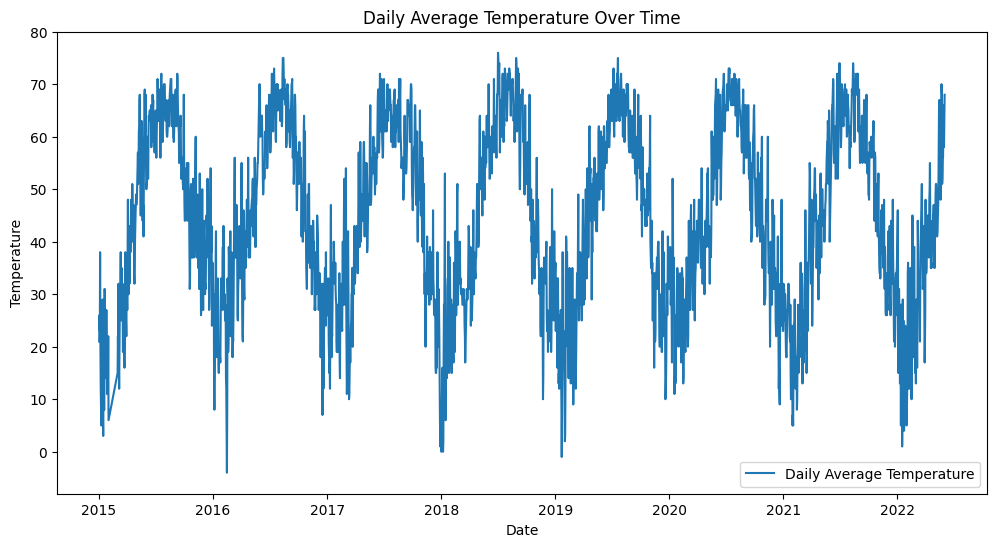

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['DATE'], merged_data['DailyAverageWetBulbTemperature'], label='Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Daily Average Temperature Over Time')
plt.legend()
plt.show()

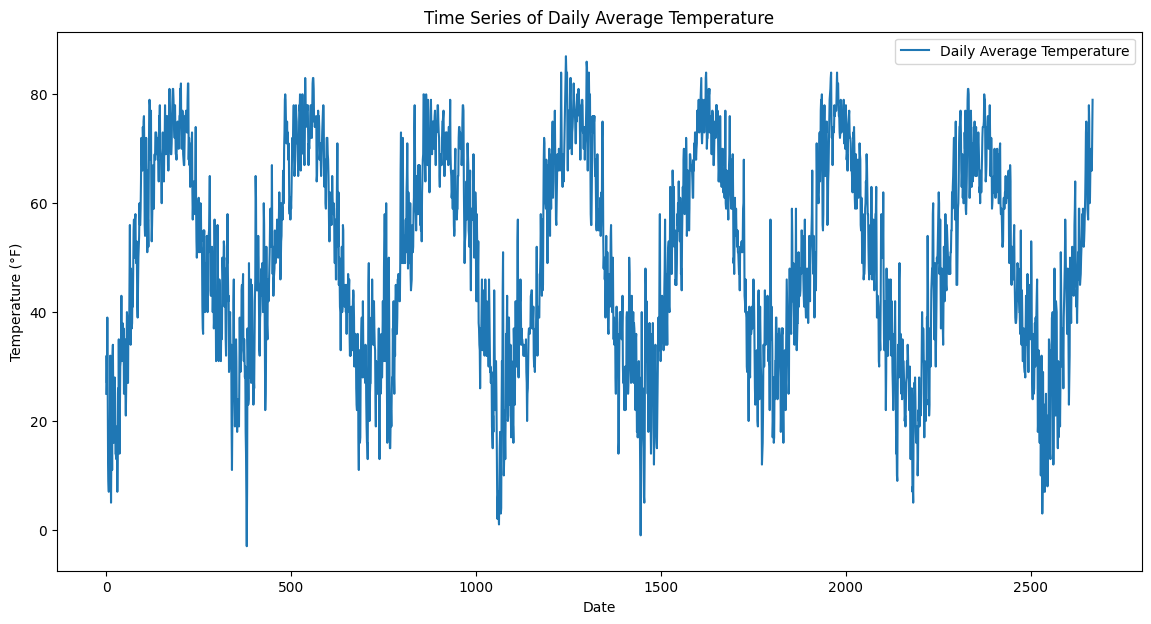

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(merged_data.index, merged_data['DailyAverageDryBulbTemperature'], label='Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Time Series of Daily Average Temperature')
plt.legend()
plt.show()

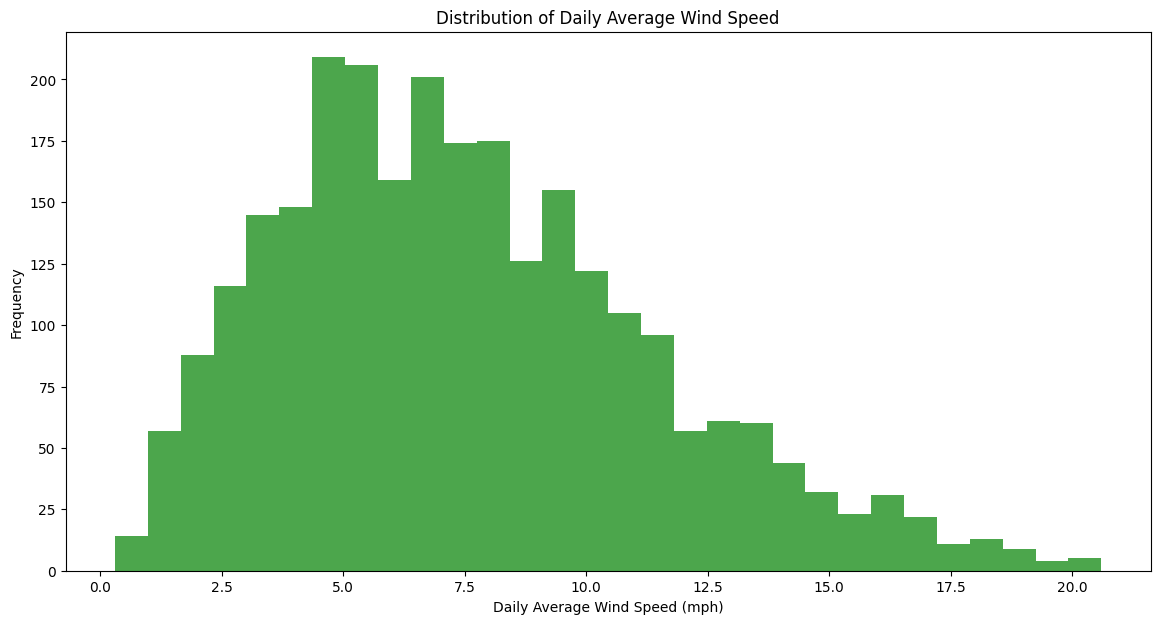

In [ ]:
# Analyze and visualize the distribution of wind speed
plt.figure(figsize=(14, 7))
plt.hist(merged_data['DailyAverageWindSpeed'], bins=30, color='green', alpha=0.7)
plt.xlabel('Daily Average Wind Speed (mph)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Average Wind Speed')
plt.show()

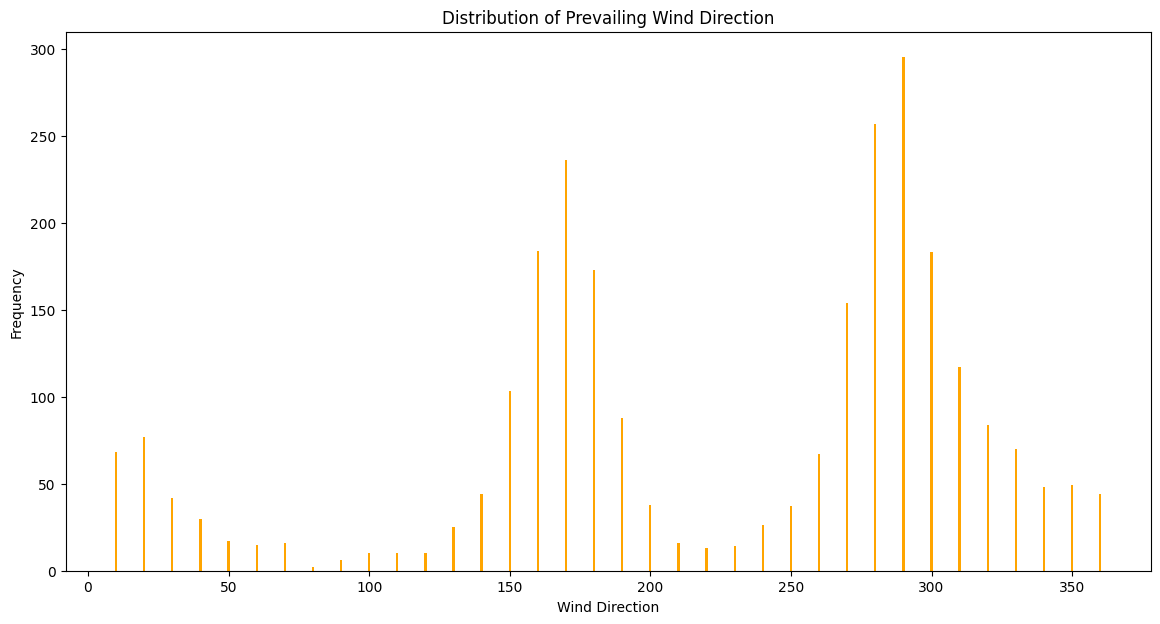

In [ ]:
# Identify and visualize the prevailing wind direction
plt.figure(figsize=(14, 7))
plt.bar(merged_data['DailyPeakWindDirection'].value_counts().index, merged_data['DailyPeakWindDirection'].value_counts().values, color='orange')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.title('Distribution of Prevailing Wind Direction')
plt.show()

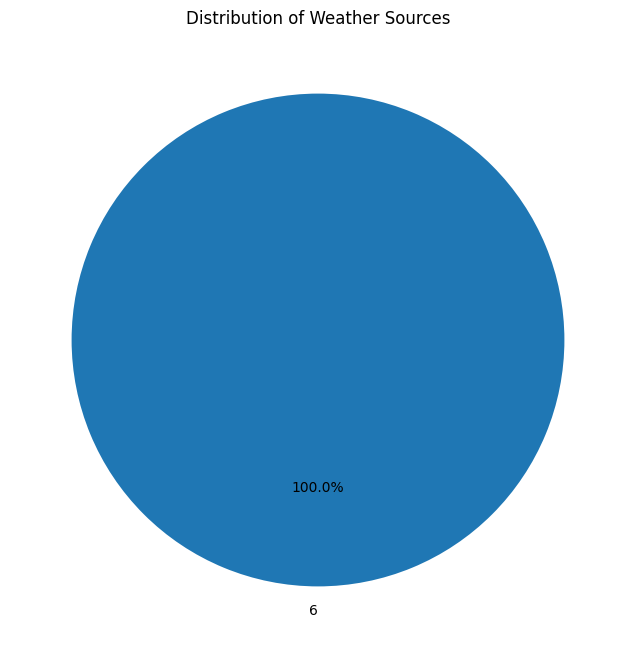

In [ ]:
source_distribution = daily_data['SOURCE'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(source_distribution, labels=source_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Weather Sources')
plt.show()

In [ ]:
# Check data types of specific columns
print(hourly_data[['HourlyDewPointTemperature', 'HourlyDryBulbTemperature']].dtypes)

HourlyDewPointTemperature    object
HourlyDryBulbTemperature     object
dtype: object


In [ ]:
# Unique values in the 'REPORT_TYPE' column for each dataset
unique_conditions_daily = daily_data['REPORT_TYPE'].unique()
unique_conditions_hourly = hourly_data['REPORT_TYPE'].unique()
unique_conditions_three_hour = three_hour_data['REPORT_TYPE'].unique()

# Combine unique conditions from all datasets
all_unique_conditions = set(unique_conditions_daily) | set(unique_conditions_hourly) | set(unique_conditions_three_hour)

# Print the unique weather conditions
print("Unique Weather Conditions:")
for condition in all_unique_conditions:
    print(condition)

Unique Weather Conditions:
nan
FM-12
FM-15


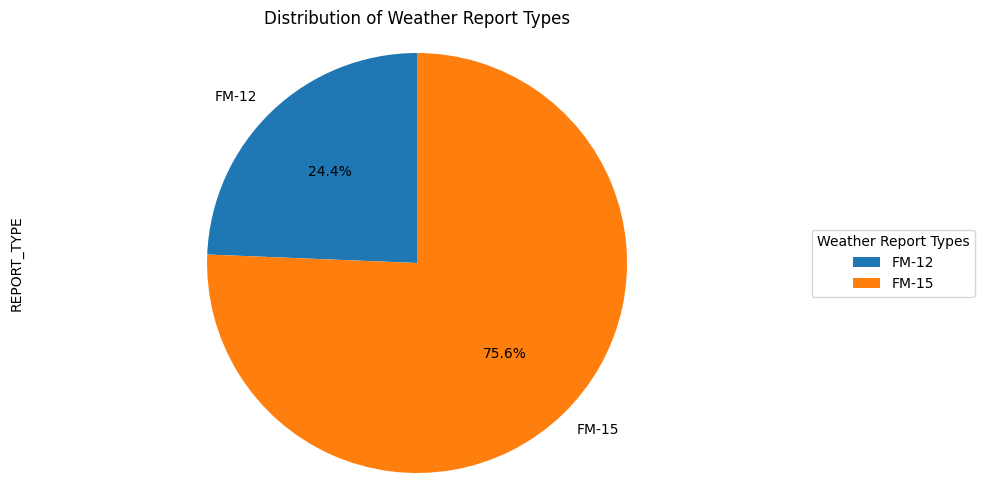

In [ ]:
# Assuming daily_data, hourly_data, and three_hour_data are your DataFrames
# Replace 'REPORT_TYPE' with the actual column name in your datasets
report_types_daily = daily_data['REPORT_TYPE'].value_counts()
report_types_hourly = hourly_data['REPORT_TYPE'].value_counts()
report_types_three_hour = three_hour_data['REPORT_TYPE'].value_counts()

# Combine counts from all datasets
combined_report_types = report_types_daily.add(report_types_hourly, fill_value=0)
combined_report_types = combined_report_types.add(report_types_three_hour, fill_value=0)

# Plot the pie chart with previous colors
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors  # Using tab10 colormap for consistent colors
combined_report_types.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)

# Add a legend
plt.legend(combined_report_types.index, title='Weather Report Types', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Weather Report Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()